# Arbeitszeiten Analyse

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib.ticker import FuncFormatter

df = pd.read_csv('Arbeitszeiten_stack_fuel.csv', sep=';', header=2)

df = df.drop(df.columns[-5:], axis=1)
df['date'] = pd.to_datetime(df['date'], format='%d.%m.%Y')

col_additions = ['Arbeitsbeginn_h', 'Arbeitsende_h', 'Arbeitszeit_h']
for i, col_name in enumerate(['Arbeitsbeginn', 'Arbeitsende', 'Geleistete Arbeitszeit']):
    df[col_name] = pd.to_datetime(df[col_name])
    df.loc[df[col_name].isnull(), col_name] = pd.NaT
    df[col_additions[i]] = df.loc[:, col_name].dt.hour + df.loc[:, col_name].dt.minute/60 #pd.Series([x.hour + x.minute/60 for x in df.loc[:,'Arbeitsbeginn']])

df['cum_Arbeitszeit_pro_Woche_h'] = np.nan
for i in df.index:
    #print(i)
    if df.loc[i, 'Wochentag'] == 'Montag':
        df.loc[i, 'cum_Arbeitszeit_pro_Woche_h'] = df.loc[i, 'Arbeitszeit_h']
    else:
        df.loc[i, 'cum_Arbeitszeit_pro_Woche_h'] = np.nansum([df.loc[i - 1, 'cum_Arbeitszeit_pro_Woche_h'], df.loc[i, 'Arbeitszeit_h']])

df['Nominale Arbeitszeit'] = pd.to_datetime(df['Nominale Arbeitszeit'])
df['cum_Arbeitszeit_nominal_pro_Woche_h'] = np.nan
for i in df.index:
    
    #print(i)
    #print(df.loc[i, 'Nominale Arbeitszeit'])
    
    if not pd.isna(df.loc[i, 'Nominale Arbeitszeit']):
        nom_h = df.loc[i, 'Nominale Arbeitszeit'].hour + df.loc[i, 'Nominale Arbeitszeit'].minute/60 # error due to NaN
    else:
        nom_h = np.nan
        
    if df.loc[i, 'Wochentag'] == 'Montag':
        df.loc[i, 'cum_Arbeitszeit_nominal_pro_Woche_h'] = nom_h
    else:
        df.loc[i, 'cum_Arbeitszeit_nominal_pro_Woche_h'] = np.nansum([df.loc[i - 1, 'cum_Arbeitszeit_nominal_pro_Woche_h'], nom_h])        

df.index=df['date']
        
df.tail()

,KW,Wochentag,date,Arbeitsbeginn,Arbeitsende,Pausenzeit,Geleistete Arbeitszeit,Nominale Arbeitszeit,Mehrarbeit,Kumulative Arbeitszeit pro Woche,Kommentar,Arbeitsbeginn_h,Arbeitsende_h,Arbeitszeit_h,cum_Arbeitszeit_pro_Woche_h,cum_Arbeitszeit_nominal_pro_Woche_h
date,,,,,,,,,,,,,,,,
2019-07-01,27,Montag,2019-07-01,2019-07-10 09:10:00,2019-07-10 18:10:00,01:00,2019-07-10 08:00:00,2019-07-10 08:00:00,1:30,8:00,NaN,9.166667,18.166667,8.000000,8.000000,8.0
2019-07-02,27,Dienstag,2019-07-02,2019-07-10 08:50:00,2019-07-10 18:20:00,01:00,2019-07-10 08:30:00,2019-07-10 08:00:00,0:30,16:30,NaN,8.833333,18.333333,8.500000,16.500000,16.0
2019-07-03,27,Mittwoch,2019-07-03,2019-07-10 09:15:00,2019-07-10 18:45:00,01:00,2019-07-10 08:30:00,2019-07-10 08:00:00,0:30,25:00,NaN,9.250000,18.750000,8.500000,25.000000,24.0
2019-07-04,27,Donnerstag,2019-07-04,2019-07-10 08:45:00,2019-07-10 19:10:00,01:00,2019-07-10 09:25:00,2019-07-10 08:00:00,1:25,34:25,NaN,8.750000,19.166667,9.416667,34.416667,32.0
2019-07-05,27,Freitag,2019-07-05,2019-07-10 09:35:00,2019-07-10 17:00:00,01:00,2019-07-10 06:25:00,2019-07-10 08:00:00,##############################################...,40:50,NaN,9.583333,17.000000,6.416667,40.833333,40.0


In [2]:
df_KW = df.loc[:, ['cum_Arbeitszeit_pro_Woche_h', 'cum_Arbeitszeit_nominal_pro_Woche_h']].resample("7d").max()
df_KW['perc_extra_hours'] = ((df_KW['cum_Arbeitszeit_pro_Woche_h'] / df_KW['cum_Arbeitszeit_nominal_pro_Woche_h']) - 1)
df_KW.tail()

,cum_Arbeitszeit_pro_Woche_h,cum_Arbeitszeit_nominal_pro_Woche_h,perc_extra_hours
date,,,
2019-06-03,36.750000,32.0,0.148438
2019-06-10,24.416667,24.0,0.017361
2019-06-17,22.750000,22.5,0.011111
2019-06-24,NaN,NaN,NaN
2019-07-01,40.833333,40.0,0.020833


In [3]:
def nuss_style_fun(ax, title, author_line=True):
    
    #remove top and right frame parts
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    # set left and bottom axis to grey
    ax.spines['left'].set_color('grey')
    ax.spines['bottom'].set_color('grey')
    
    # set ticks to grey
    ax.tick_params(axis='x', colors='grey')
    ax.tick_params(axis='y', colors='grey')
    
    #set labels to grey
    ax.yaxis.label.set_color('grey')
    ax.xaxis.label.set_color('grey') 
    
    # align axis labels with axis ends
    ax.set_xlabel(xlabel=None,
                  position=[0, 0],
                  horizontalalignment='left',
                  color='grey',
                  size=14)
    ax.set_ylabel(ylabel=None,
                  position=[0, 1],
                  horizontalalignment='right',
                  color='grey',
                  size=14)
    
    #align title
    ax.set_title(label=title,
                 loc='left',
                 color=(0.41, 0.41, 0.41),
                 size=20)
    
    #author line
    if author_line:
        fig.text(0.99, 0.01, '@rikunert', color='lightgrey', style='italic',
             horizontalalignment='right')
    
    return ax

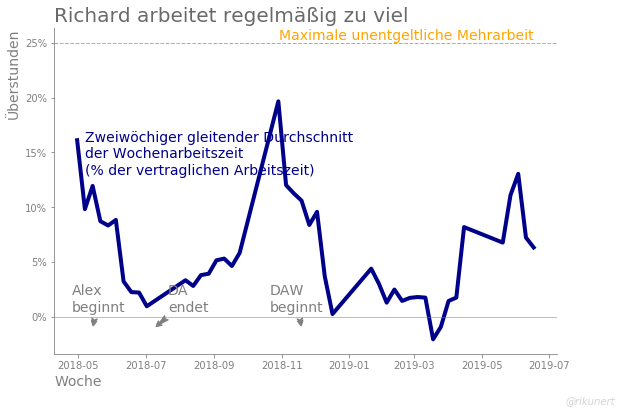

In [4]:
fig, ax = plt.subplots(figsize=[9, 18/3])
sns.lineplot(data=df_KW['perc_extra_hours'].rolling(4).mean(), ax=ax, 
             color='darkblue',
            linewidth=4)
ax.axhline(y=0, color='grey', linewidth=0.5)
ax.axhline(y=0.25, linestyle='--', color='orange', linewidth=1)
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 

ax = nuss_style_fun(ax, title='Richard arbeitet regelmäßig zu viel')

ax.set(xlabel='Woche',
       ylabel='Überstunden')

ax.text(x=df_KW.index[4],
       y=0.13,
       s='Zweiwöchiger gleitender Durchschnitt\nder Wochenarbeitszeit\n(% der vertraglichen Arbeitszeit)',
       color='darkblue',
       size=14)

ax.text(x=df_KW.index[-3],
       y=0.25,
       s='Maximale unentgeltliche Mehrarbeit',
        horizontalalignment='right',
        verticalalignment='bottom',
        color='orange',
       size=14)

ax.annotate("Alex\nbeginnt",
            color='grey', size=14,
            xy=(pd.Timestamp(2018,5,14), -0.01), xycoords='data',
            xytext=(pd.Timestamp(2018,4,25), 0.005), textcoords='data',
            arrowprops=dict(arrowstyle="fancy",
                           color='grey'))

ax.annotate("DA\nendet",
            color='grey', size=14,
            xy=(pd.Timestamp(2018, 7, 9), -0.01), xycoords='data',
            xytext=(pd.Timestamp(2018, 7, 21), 0.005), textcoords='data',
            arrowprops=dict(arrowstyle="fancy",
                           color='grey'))

ax.annotate("DAW\nbeginnt",
            color='grey', size=14,
            xy=(pd.Timestamp(2018, 11, 19), -0.01), xycoords='data',
            xytext=(pd.Timestamp(2018, 10, 21), 0.005), textcoords='data',
            arrowprops=dict(arrowstyle="fancy",
                           color='grey'))
'''
ax.annotate("Neuer\nVertrag",
            color='grey', size=14,
            xy=(pd.Timestamp(2019, 1, 18), -0.01), xycoords='data',
            xytext=(pd.Timestamp(2018, 12, 1), 0.005), textcoords='data',
            arrowprops=dict(arrowstyle="fancy",
                           color='grey'))
'''
fig.patch.set_facecolor('w')
#fig.savefig('extra_hours.png')

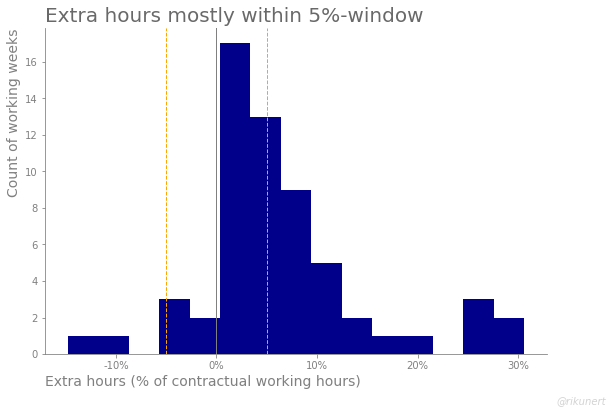

In [5]:
df_KW['perc_extra_hours'] = ((df_KW['cum_Arbeitszeit_pro_Woche_h'] / df_KW['cum_Arbeitszeit_nominal_pro_Woche_h']) - 1)

fig, ax = plt.subplots(figsize=[9, 18/3])
df_KW['perc_extra_hours'].plot(kind='hist', bins=15,
                               ax=ax, color='darkblue')

ax = nuss_style_fun(ax, 
                    title='Extra hours mostly within 5%-window')

ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.0%}'.format(x))) 

ax.axvline(x=0, color='grey', linewidth=1)
ax.axvline(x=0.05, linestyle='--', color='orange', linewidth=1)
ax.axvline(x=-0.05, linestyle='--', color='orange', linewidth=1)

ax.set(xlabel='Extra hours (% of contractual working hours)',
       ylabel='Count of working weeks')

fig.patch.set_facecolor('w')
fig.savefig('extra_hours_hist.png')

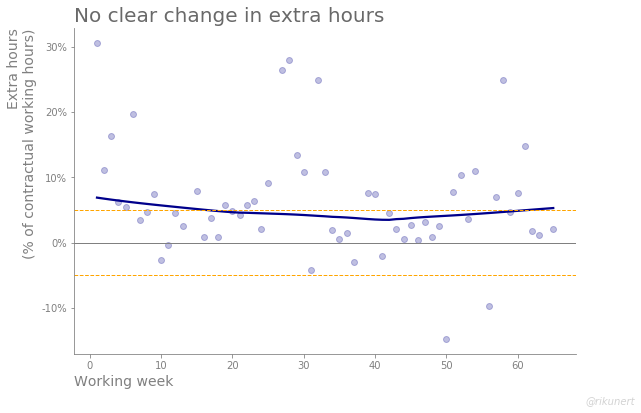

In [6]:
fig, ax = plt.subplots(figsize=[9, 18/3])
ax = nuss_style_fun(ax, title='No clear change in extra hours')
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.0%}'.format(x))) 

sns.regplot(x=list(range(1, len(df_KW)+1)),
            y=df_KW['perc_extra_hours'],
            lowess=True,
            scatter_kws={'color': 'darkblue',
                        'alpha': 0.25},
            line_kws={'color': 'darkblue'},
            ax=ax)

ax.axhline(y=0, color='grey', linewidth=1)
ax.axhline(y=0.05, linestyle='--', color='orange', linewidth=1)
ax.axhline(y=-0.05, linestyle='--', color='orange', linewidth=1)

ax.set(ylabel='Extra hours\n(% of contractual working hours)',
       xlabel='Working week')

fig.savefig('extra_hours_scatter.png')

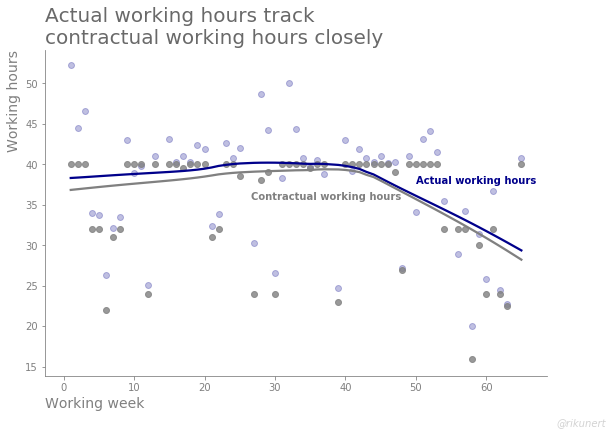

In [7]:
fig, ax = plt.subplots(figsize=[9, 18/3])
ax = nuss_style_fun(ax, title='Actual working hours track \ncontractual working hours closely')
#ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.0%}'.format(x))) 

sns.regplot(x=list(range(1, len(df_KW)+1)),
            y=df_KW['cum_Arbeitszeit_pro_Woche_h'],
            lowess=True,
            scatter_kws={'color': 'darkblue',
                        'alpha': 0.25},
            line_kws={'color': 'darkblue'},
            ax=ax)

sns.regplot(x=list(range(1, len(df_KW)+1)),
            y=df_KW['cum_Arbeitszeit_nominal_pro_Woche_h'],
            lowess=True,
            scatter_kws={'color': 'grey',
                        'alpha': 0.8},
            line_kws={'color': 'grey'},
            ax=ax)

# legend
ax.text(x=48,
                y=36,
                s='Contractual working hours',
                color='grey',
                verticalalignment='center',
        ha='right',
       weight='bold')

ax.text(x=50,
                y=38,
                s='Actual working hours',
                color='darkblue',
        #backgroundcolor='white',
                verticalalignment='center',
        ha='left',
       weight='bold')

ax.set(ylabel='Working hours',
       xlabel='Working week')

fig.savefig('working_hours_scatter.png')

In [14]:
df_KW.loc[:, 'compensation_potential_h'] = (df_KW['perc_extra_hours'] - 0.05) * df_KW['cum_Arbeitszeit_nominal_pro_Woche_h']

mask_negative = (df_KW['perc_extra_hours']) < -0.05
df_KW.loc[mask_negative, 'compensation_potential_h'] = (df_KW.loc[mask_negative, 'perc_extra_hours'] + 0.05) * df_KW.loc[mask_negative, 'cum_Arbeitszeit_nominal_pro_Woche_h']

mask_neutral = ((df_KW['perc_extra_hours']) >= -0.05) & ((df_KW['perc_extra_hours']) <= 0.05)
df_KW.loc[mask_neutral, 'compensation_potential_h'] = 0

mask_positive = (df_KW['perc_extra_hours']) > 0.05

print('Weeks below 5%', mask_negative.sum())
print('Weeks within 5%', mask_neutral.sum())
print('Weeks above 5%', mask_positive.sum(), '\n')

print((df_KW.loc[mask_negative, 'compensation_potential_h']).sum())
print((df_KW.loc[mask_neutral, 'compensation_potential_h']).sum())
print((df_KW.loc[mask_positive, 'compensation_potential_h']).sum(), '\n')

print((df_KW.loc[:, 'compensation_potential_h']).sum())

Weeks below 5% 2
Weeks within 5% 31
Weeks above 5% 27 

-5.399999999999995
0.0
69.24166666666666 

63.841666666666654
